In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import re
from statistics import mode #found on https://stackoverflow.com/questions/10797819/finding-the-mode-of-a-list)
import random
from random import choice

# Using https://pypi.org/project/folium/, I was able to work with heat maps.
# I needed to install folium first through the terminal using this command line:  pip install folium

import folium

from folium import plugins
from folium.map import Layer
from folium.utilities import _isnan, _iter_tolist, none_max, none_min
from folium import plugins
from folium.plugins import HeatMap

# matplotlib imports
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.subplots(figsize=(10,6))
%matplotlib inline

# seaborn imports
import seaborn as sns
sns.set(color_codes=True)

order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 
               'October', 'November', 'December']

## Location of the Boston Crime Dataset:

- df_cri ("Boston Crime"):  https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system/resource/12cb3883-56f5-47de-afa5-3b1cf61b257b

In [4]:
ls

Police_Districts.csv               df_criUnique.csv
Project (df_cri) Dataset.ipynb     df_criclean.csv
Project (df_criclean MERGE).ipynb  df_cricleanMERGE2.ipynb
Rest.Inspections.ipynb             df_ins.csv
df_cri.csv                         df_ins.csv.zip
df_cri.zip


In [5]:
df_cri = pd.read_csv('df_cri.csv')
df_cri.head(10)

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
0,I192017516,616,Larceny,LARCENY THEFT OF BICYCLE,D14,794,NaN,2019-03-08 17:00:00,2019,3,Friday,17,Part One,GLENVILLE AVE,42.349780,-71.134230,"(42.34977988, -71.13423049)"
1,I192017513,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,C11,407,NaN,2019-03-08 21:13:00,2019,3,Friday,21,Part Three,WASHINGTON ST,42.273420,-71.070000,"(42.27342041, -71.07000030)"
2,I192017507,3115,Investigate Person,INVESTIGATE PERSON,E13,574,NaN,2019-03-08 08:00:00,2019,3,Friday,8,Part Three,WASHINGTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
3,I192017506,3115,Investigate Person,INVESTIGATE PERSON,E13,574,NaN,2019-03-08 21:33:00,2019,3,Friday,21,Part Three,WASHINGTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
4,I192017503,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,A7,22,NaN,2019-03-08 20:44:00,2019,3,Friday,20,Part Three,HAVRE ST,42.374951,-71.035879,"(42.37495129, -71.03587934)"
5,I192017499,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,NaN,,NaN,2019-03-08 20:00:00,2019,3,Friday,20,Part Three,O'MEARA,NaN,NaN,"(0.00000000, 0.00000000)"
6,I192017498,3114,Investigate Property,INVESTIGATE PROPERTY,B2,259,NaN,2019-03-08 19:06:00,2019,3,Friday,19,Part Three,MAGNOLIA ST,42.314784,-71.071610,"(42.31478432, -71.07160997)"
7,I192017496,613,Larceny,LARCENY SHOPLIFTING,D4,624,NaN,2019-03-08 20:43:00,2019,3,Friday,20,Part One,BOYLSTON ST,42.344896,-71.096592,"(42.34489594, -71.09659186)"
8,I192017495,802,Simple Assault,ASSAULT SIMPLE - BATTERY,A1,115,NaN,2019-03-08 20:01:00,2019,3,Friday,20,Part Two,SOUTH ST,42.350152,-71.057533,"(42.35015241, -71.05753303)"
9,I192017494,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,NaN,,NaN,2019-03-08 16:00:00,2019,3,Friday,16,Part Three,NaN,42.351717,-71.078133,"(42.35171705, -71.07813283)"


In [6]:
df_cri.isnull().sum()

incident_number             0
offense_code                0
offense_code_group          0
offense_description         0
district                 1983
reporting_area              0
shooting               366862
occurred_on_date            0
year                        0
month                       0
day_of_week                 0
hour                        0
ucr_part                  100
street                  11536
lat                     23888
long                    23888
location                    0
dtype: int64

In [7]:
df_cri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368348 entries, 0 to 368347
Data columns (total 17 columns):
incident_number        368348 non-null object
offense_code           368348 non-null int64
offense_code_group     368348 non-null object
offense_description    368348 non-null object
district               366365 non-null object
reporting_area         368348 non-null object
shooting               1486 non-null object
occurred_on_date       368348 non-null object
year                   368348 non-null int64
month                  368348 non-null int64
day_of_week            368348 non-null object
hour                   368348 non-null int64
ucr_part               368248 non-null object
street                 356812 non-null object
lat                    344460 non-null float64
long                   344460 non-null float64
location               368348 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 47.8+ MB


In [8]:
df_cri.shape

(368348, 17)

In [9]:
df_cri.shooting.unique()

array([nan, 'Y'], dtype=object)

In [10]:
# It looks like there are 1,486 'Y' and a whole bunch of NaN.  
# This means that there are that many shootings documented.  
# I am going to use fillna to put in 'N' for No.
# This is an assumption, however, which means we should discuss if this is OK.

df_cri['shooting'].value_counts(dropna = False)

NaN    366862
Y        1486
Name: shooting, dtype: int64

In [11]:
df_cri['shooting'].fillna('N', inplace=True)
df_cri['shooting'].value_counts(dropna = False)

N    366862
Y      1486
Name: shooting, dtype: int64

## Now that shooting is fixed, I'll investigate the other columns that have NaN's.

In [12]:
df_cri.isnull().sum()

incident_number            0
offense_code               0
offense_code_group         0
offense_description        0
district                1983
reporting_area             0
shooting                   0
occurred_on_date           0
year                       0
month                      0
day_of_week                0
hour                       0
ucr_part                 100
street                 11536
lat                    23888
long                   23888
location                   0
dtype: int64

In [13]:
df_cri['district'].value_counts(dropna = False)

B2     57866
C11    49428
D4     47957
B3     41629
A1     41500
C6     26437
D14    23201
E13    20132
E18    20116
E5     15569
A7     14984
A15     7546
NaN     1983
Name: district, dtype: int64

### Since district is correlated to location, rather than impute values, I will remove them entirely.

In [14]:
# I'll drop only rows considering 'district' by setting the subset='district'.

df_cri = df_cri.dropna(subset=['district'])
df_cri.isnull().sum()

incident_number            0
offense_code               0
offense_code_group         0
offense_description        0
district                   0
reporting_area             0
shooting                   0
occurred_on_date           0
year                       0
month                      0
day_of_week                0
hour                       0
ucr_part                 100
street                 10386
lat                    23543
long                   23543
location                   0
dtype: int64

## Now I'll focus on ucr_part.
 - According to the site: [UCR_Part] [varchar](25) NULL,	Universal Crime Reporting Part number (1,2, 3)

In [15]:
df_cri['ucr_part'].value_counts(dropna = False)

Part Three    182786
Part Two      111748
Part One       70312
Other           1419
NaN              100
Name: ucr_part, dtype: int64

In [16]:
# I'm going to replace 'Other' with NaN and just chalk it up as a loss.

df_cri['ucr_part'].replace({'Other':np.nan}, inplace=True)
df_cri['ucr_part'].value_counts(dropna = False)

Part Three    182786
Part Two      111748
Part One       70312
NaN             1519
Name: ucr_part, dtype: int64

In [17]:
df_cri = df_cri.dropna(subset=['ucr_part'])
df_cri.isnull().sum()

incident_number            0
offense_code               0
offense_code_group         0
offense_description        0
district                   0
reporting_area             0
shooting                   0
occurred_on_date           0
year                       0
month                      0
day_of_week                0
hour                       0
ucr_part                   0
street                 10352
lat                    23443
long                   23443
location                   0
dtype: int64

In [18]:
df_cri.shape

(364846, 17)

## Now I need to take a look at street.

In [19]:
# There are alot of streets involved. 4,406 different ones.

df_cri.street.nunique()

4406

In [20]:
# These are the top 20 streets where an infraction occurred.
# NaN is #2 out of the top 20.  This needs to be dropped.

df_cri['street'].value_counts(dropna=False).head(20)

WASHINGTON ST        16511
NaN                  10352
BLUE HILL AVE         9002
BOYLSTON ST           8313
DORCHESTER AVE        5858
TREMONT ST            5540
MASSACHUSETTS AVE     5382
HARRISON AVE          5353
CENTRE ST             5090
COMMONWEALTH AVE      4806
HYDE PARK AVE         4053
COLUMBIA RD           3689
HUNTINGTON AVE        3438
RIVER ST              3301
DUDLEY ST             2748
COLUMBUS AVE          2692
WARREN ST             2673
ADAMS ST              2379
BEACON ST             2257
NEWBURY ST            2225
Name: street, dtype: int64

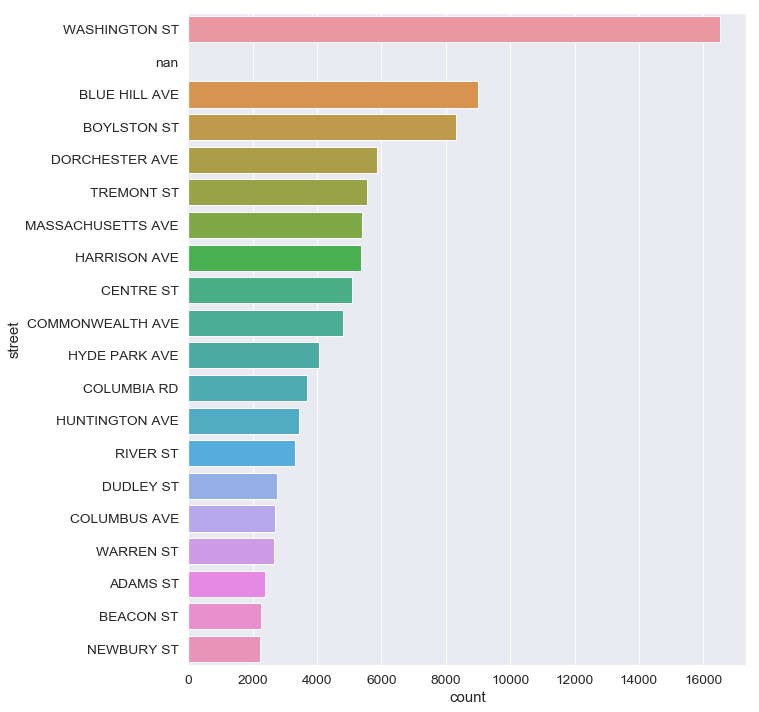

In [21]:
# These are the top 20 offense_code_groups according to the data.

sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(10,12))
sns.countplot(y='street', data=df_cri, order=df_cri.street.value_counts(dropna=False).iloc[:20].index)

In [22]:
df_cri = df_cri.dropna(subset=['street'])
df_cri.isnull().sum()

incident_number            0
offense_code               0
offense_code_group         0
offense_description        0
district                   0
reporting_area             0
shooting                   0
occurred_on_date           0
year                       0
month                      0
day_of_week                0
hour                       0
ucr_part                   0
street                     0
lat                    14197
long                   14197
location                   0
dtype: int64

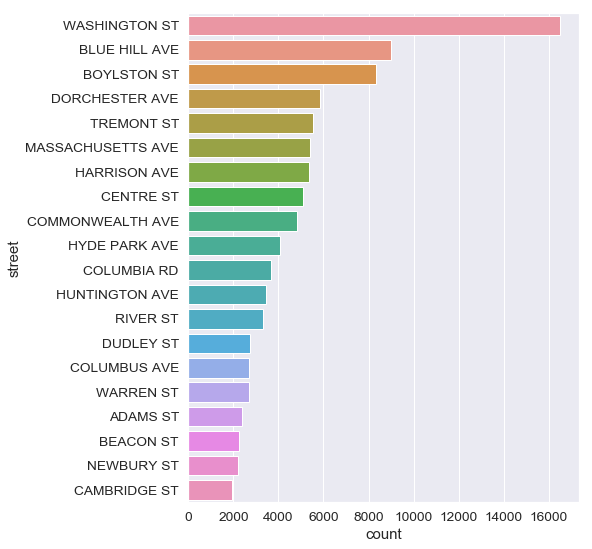

In [23]:
# These are the top 20 streets according to the data after NaN is dropped.

sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(7,9))
sns.countplot(y='street', data=df_cri, order=df_cri.street.value_counts(dropna=False).iloc[:20].index)

## Now I need to investigate lat & long.  

In [24]:
# This is the number of unique lat coordinates.

df_cri['lat'].nunique()

18122

In [25]:
# This is the number of unique long coordinates.  There are two additional in lat that are not in long.

df_cri['long'].nunique()

18120

In [26]:
# both lat and long have the same amount of NaN's.  But are they the same?

df_cri.lat.isnull().sum()

14197

In [27]:
df_cri.long.isnull().sum()

14197

In [28]:
# I'm going to drop the na's and hopefully they are the same ones in both columns.
# I'll just choose lat as the subset.
# And this worked! No more NaN's!

df_cri = df_cri.dropna(subset=['lat'])
df_cri.isnull().sum()

incident_number        0
offense_code           0
offense_code_group     0
offense_description    0
district               0
reporting_area         0
shooting               0
occurred_on_date       0
year                   0
month                  0
day_of_week            0
hour                   0
ucr_part               0
street                 0
lat                    0
long                   0
location               0
dtype: int64

In [29]:
df_cri.shape

(340297, 17)

One thing that I noticed about location was there was coordinates with (-1.000,-1.000) which tells me that this should be removed because for some reason they were changed to that rather than NaN.

In [30]:
df_cri.location.min()

'(-1.00000000, -1.00000000)'

In [31]:
df_cri.location.max()

'(42.39504158, -71.01017732)'

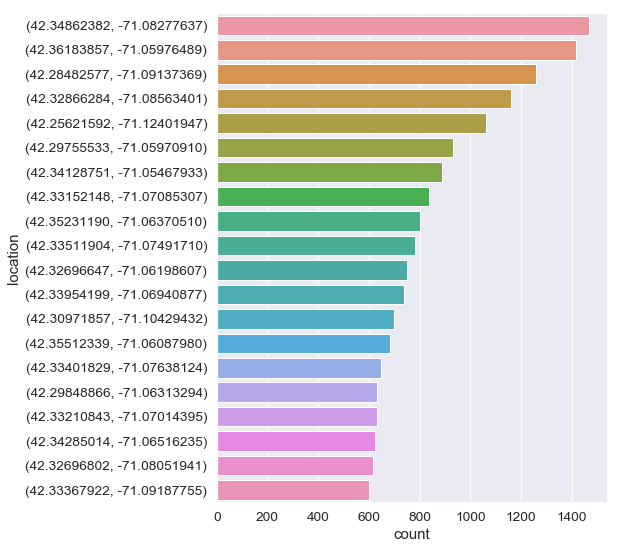

In [32]:
# These are the top 20 streets according to the data after NaN is dropped. 
# That weird location isn't in the top 20 at least.

sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(7,9))
sns.countplot(y='location', data=df_cri, order=df_cri.location.value_counts(dropna=False).iloc[:20].index)

In [33]:
# There are 201 occurences of this string coming up in the data.
# I think I'm going to just drop these 201 occurences so I can have a clean set of data.

df_cri.location.str.contains('(-1.00000000, -1.00000000)', case=False).sum()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


201

In [34]:
df_cri['location'].replace({'(-1.00000000, -1.00000000)':np.nan}, inplace=True)
df_cri.location.str.contains('(-1.00000000, -1.00000000)', case=False).sum()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


0

In [35]:
df_cri.isnull().sum()

incident_number          0
offense_code             0
offense_code_group       0
offense_description      0
district                 0
reporting_area           0
shooting                 0
occurred_on_date         0
year                     0
month                    0
day_of_week              0
hour                     0
ucr_part                 0
street                   0
lat                      0
long                     0
location               201
dtype: int64

In [36]:
# I'll just choose location as the subset.
# And this worked! No more NaN's!

df_cri = df_cri.dropna(subset=['location'])
df_cri.isnull().sum()

incident_number        0
offense_code           0
offense_code_group     0
offense_description    0
district               0
reporting_area         0
shooting               0
occurred_on_date       0
year                   0
month                  0
day_of_week            0
hour                   0
ucr_part               0
street                 0
lat                    0
long                   0
location               0
dtype: int64

In [37]:
df_cri.shape

(340096, 17)

## I'm finished dropping the NaN's from the dataset. 
- I'll create a copy
- Then I will alter the dtypes to what I think they should be.

In [38]:
df_criclean = df_cri.copy(deep=True)

In [39]:
df_criclean.dtypes

incident_number         object
offense_code             int64
offense_code_group      object
offense_description     object
district                object
reporting_area          object
shooting                object
occurred_on_date        object
year                     int64
month                    int64
day_of_week             object
hour                     int64
ucr_part                object
street                  object
lat                    float64
long                   float64
location                object
dtype: object

In [40]:
df_criclean.describe()

,offense_code,year,month,hour,lat,long
count,340096.000000,340096.000000,340096.000000,340096.000000,340096.000000,340096.000000
mean,2303.402248,2016.778939,6.736874,13.113118,42.322207,-71.082938
std,1180.234787,1.119789,3.435262,6.278205,0.031917,0.029765
min,111.000000,2015.000000,1.000000,0.000000,42.232413,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297521,-71.097352
50%,2907.000000,2017.000000,7.000000,14.000000,42.325574,-71.077640
75%,3201.000000,2018.000000,10.000000,18.000000,42.348624,-71.062573
max,3831.000000,2019.000000,12.000000,23.000000,42.395042,-70.963676


In [41]:
df_criclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340096 entries, 0 to 368347
Data columns (total 17 columns):
incident_number        340096 non-null object
offense_code           340096 non-null int64
offense_code_group     340096 non-null object
offense_description    340096 non-null object
district               340096 non-null object
reporting_area         340096 non-null object
shooting               340096 non-null object
occurred_on_date       340096 non-null object
year                   340096 non-null int64
month                  340096 non-null int64
day_of_week            340096 non-null object
hour                   340096 non-null int64
ucr_part               340096 non-null object
street                 340096 non-null object
lat                    340096 non-null float64
long                   340096 non-null float64
location               340096 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 46.7+ MB


### I'm going to change some of the columns to the appropriate type.

In [42]:
df_criclean['offense_code_group'] = df_criclean['offense_code_group'].astype('category')
df_criclean['offense_description'] = df_criclean['offense_description'].astype('category')
df_criclean['district'] = df_criclean['district'].astype('category')
df_criclean['day_of_week'] = df_criclean['day_of_week'].astype('category')
df_criclean['ucr_part'] = df_criclean['ucr_part'].astype('category')
df_criclean['shooting'] = df_criclean['shooting'].astype('category')
df_criclean['year'] = df_criclean['year'].astype('category')
df_criclean['month'] = df_criclean['month'].astype('category')
df_criclean['hour'] = df_criclean['hour'].astype('category')
df_criclean['street'] = df_criclean['street'].astype('category')
df_criclean['location'] = df_criclean['location'].astype(str)
df_criclean.occurred_on_date = pd.to_datetime(df_criclean.occurred_on_date)

# df_criclean['location'] = df_criclean['location'].astype('float64') # This line is unnecessary, but thought I would keep it
# just in case there was a need later on?

df_criclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340096 entries, 0 to 368347
Data columns (total 17 columns):
incident_number        340096 non-null object
offense_code           340096 non-null int64
offense_code_group     340096 non-null category
offense_description    340096 non-null category
district               340096 non-null category
reporting_area         340096 non-null object
shooting               340096 non-null category
occurred_on_date       340096 non-null datetime64[ns]
year                   340096 non-null category
month                  340096 non-null category
day_of_week            340096 non-null category
hour                   340096 non-null category
ucr_part               340096 non-null category
street                 340096 non-null category
lat                    340096 non-null float64
long                   340096 non-null float64
location               340096 non-null object
dtypes: category(10), datetime64[ns](1), float64(2), int64(1), object(3)
memor

In [43]:
# These are the 67 unique() values
print(df_criclean.offense_code_group.unique())

# I'm changing all values to lowercase to see if anything changed. Unfortunately, only one changed.
df_criclean['offense_code_group'] = df_criclean.offense_code_group.str.lower()
print(df_criclean.offense_code_group.nunique())

# No null values which is good.
print(df_criclean.offense_code_group.isnull().sum())

[Larceny, Medical Assistance, Motor Vehicle Accident Response, Investigate Property, Simple Assault, ..., Aircraft, Criminal Harassment, Explosives, Biological Threat, Gambling]
Length: 59
Categories (59, object): [Larceny, Medical Assistance, Motor Vehicle Accident Response, Investigate Property, ..., Criminal Harassment, Explosives, Biological Threat, Gambling]
59
0


In [44]:
df_criclean.shape

(340096, 17)

In [45]:
# Right here, I'm dropping any duplicate lines.  It looks like 0.18% of the rows were dropped.
# This is fine by me.

df_criclean = df_criclean.drop_duplicates().reset_index(drop=True)
df_criclean.shape

(339492, 17)

# Write a csv file for use later:
- Run this code:  
```python 
df_criclean.to_csv('df_criclean.csv', index = False)
```

# Now for Visuals
I want to understand what is going on with this data so I put together a bunch of visuals.

In [46]:
ls

Police_Districts.csv               df_criUnique.csv
Project (df_cri) Dataset.ipynb     df_criclean.csv
Project (df_criclean MERGE).ipynb  df_cricleanMERGE2.ipynb
Rest.Inspections.ipynb             df_ins.csv
df_cri.csv                         df_ins.csv.zip
df_cri.zip


In [47]:
df_criclean.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
0,I192017516,616,larceny,LARCENY THEFT OF BICYCLE,D14,794,N,2019-03-08 17:00:00,2019,3,Friday,17,Part One,GLENVILLE AVE,42.349780,-71.134230,"(42.34977988, -71.13423049)"
1,I192017513,3006,medical assistance,SICK/INJURED/MEDICAL - PERSON,C11,407,N,2019-03-08 21:13:00,2019,3,Friday,21,Part Three,WASHINGTON ST,42.273420,-71.070000,"(42.27342041, -71.07000030)"
2,I192017503,3831,motor vehicle accident response,M/V - LEAVING SCENE - PROPERTY DAMAGE,A7,22,N,2019-03-08 20:44:00,2019,3,Friday,20,Part Three,HAVRE ST,42.374951,-71.035879,"(42.37495129, -71.03587934)"
3,I192017498,3114,investigate property,INVESTIGATE PROPERTY,B2,259,N,2019-03-08 19:06:00,2019,3,Friday,19,Part Three,MAGNOLIA ST,42.314784,-71.071610,"(42.31478432, -71.07160997)"
4,I192017496,613,larceny,LARCENY SHOPLIFTING,D4,624,N,2019-03-08 20:43:00,2019,3,Friday,20,Part One,BOYLSTON ST,42.344896,-71.096592,"(42.34489594, -71.09659186)"


In [48]:
# Make sure that you can run Folium:

!pip install folium

# If that didn't work, then try:

# !pip conda install folium -c conda-forge

             lat       long                    location  count
13798  42.348624 -71.082776  (42.34862382 -71.08277637)   1465
16140  42.361839 -71.059765  (42.36183857 -71.05976489)   1414
3555   42.284826 -71.091374  (42.28482577 -71.09137369)   1255
10235  42.328663 -71.085634  (42.32866284 -71.08563401)   1159
620    42.256216 -71.124019  (42.25621592 -71.12401947)   1060
         lat       long                    location  count
0  42.232413 -71.129715  (42.23241330 -71.12971531)     10
1  42.232656 -71.130700  (42.23265556 -71.13069992)      3
2  42.232870 -71.130050  (42.23287025 -71.13004959)      5
3  42.232907 -71.131671  (42.23290729 -71.13167059)      3
4  42.233086 -71.128157  (42.23308580 -71.12815697)     15


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


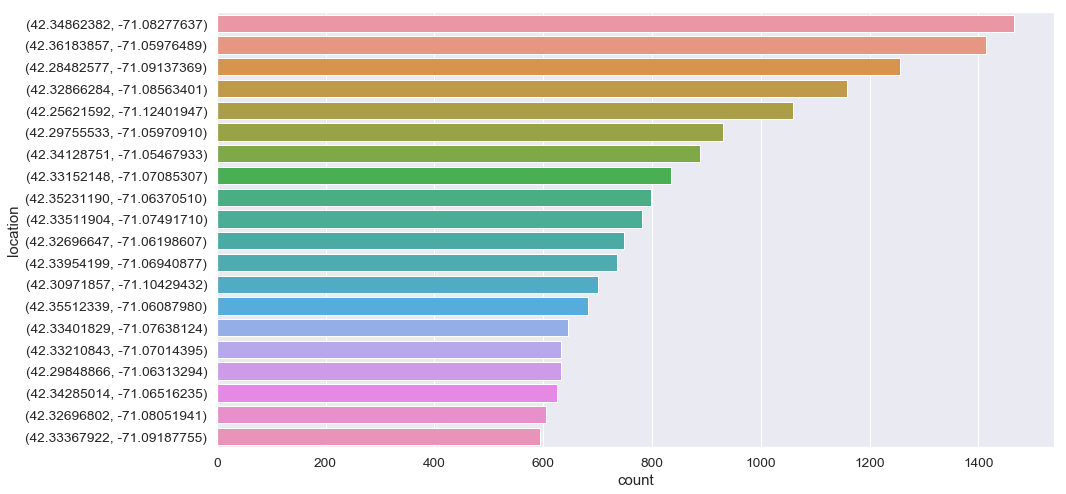

In [49]:
# These are the top 20 'coordinates' according to the data.

sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(15,8))
sns.countplot(y='location', data=df_criclean, order=df_criclean.location.value_counts().iloc[:20].index)



# Here, I'm making a Dataframe of the locations and the count.  What you see below
# is the top 5 locations. 
# I want to use this for my folium map.

df1 = df_criclean.groupby(["lat", "long", "location"]).size().reset_index(name='count')
df1['location'] = df1['location'].str.replace(',', '')

# Sort the count from highest count with location to lowest.
print(df1.sort_values(by = 'count', ascending=False).head())

# The DataFrame not sorted.
print(df1.head())

# convert to (n, 2) nd-array format for heatmap

locationArr = df1[['lat', 'long']].as_matrix()

m = folium.Map(location=[42.32, -71.0589], zoom_start=12)
m.add_child(plugins.HeatMap(locationArr, radius=9))
m

In [50]:
# To write a csv on the above unique values, run this code:

df1.to_csv('df_criUnique.csv', index = False)


In [51]:
df_criclean.isnull().sum()

incident_number        0
offense_code           0
offense_code_group     0
offense_description    0
district               0
reporting_area         0
shooting               0
occurred_on_date       0
year                   0
month                  0
day_of_week            0
hour                   0
ucr_part               0
street                 0
lat                    0
long                   0
location               0
dtype: int64

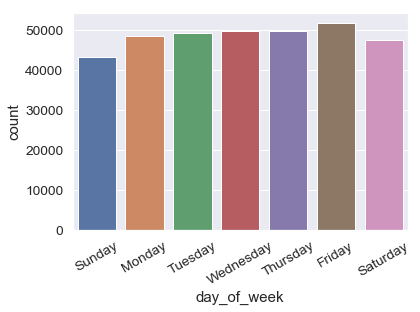

In [52]:
plt.xticks(rotation=30)
sns.countplot(x='day_of_week', data=df_criclean, order = order)

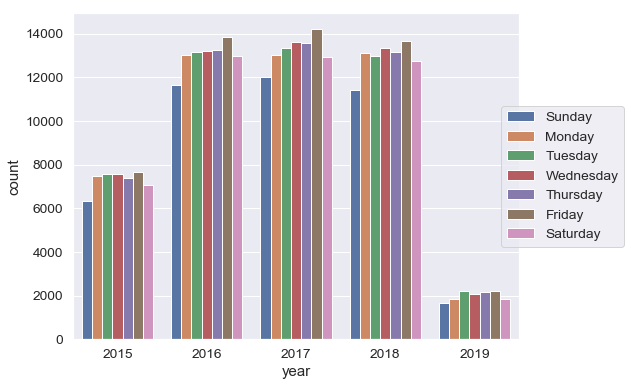

In [53]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='year', hue='day_of_week', hue_order=order, data=df_criclean).legend(loc='center right', 
                                                                                 bbox_to_anchor=(1.25, 0.5))

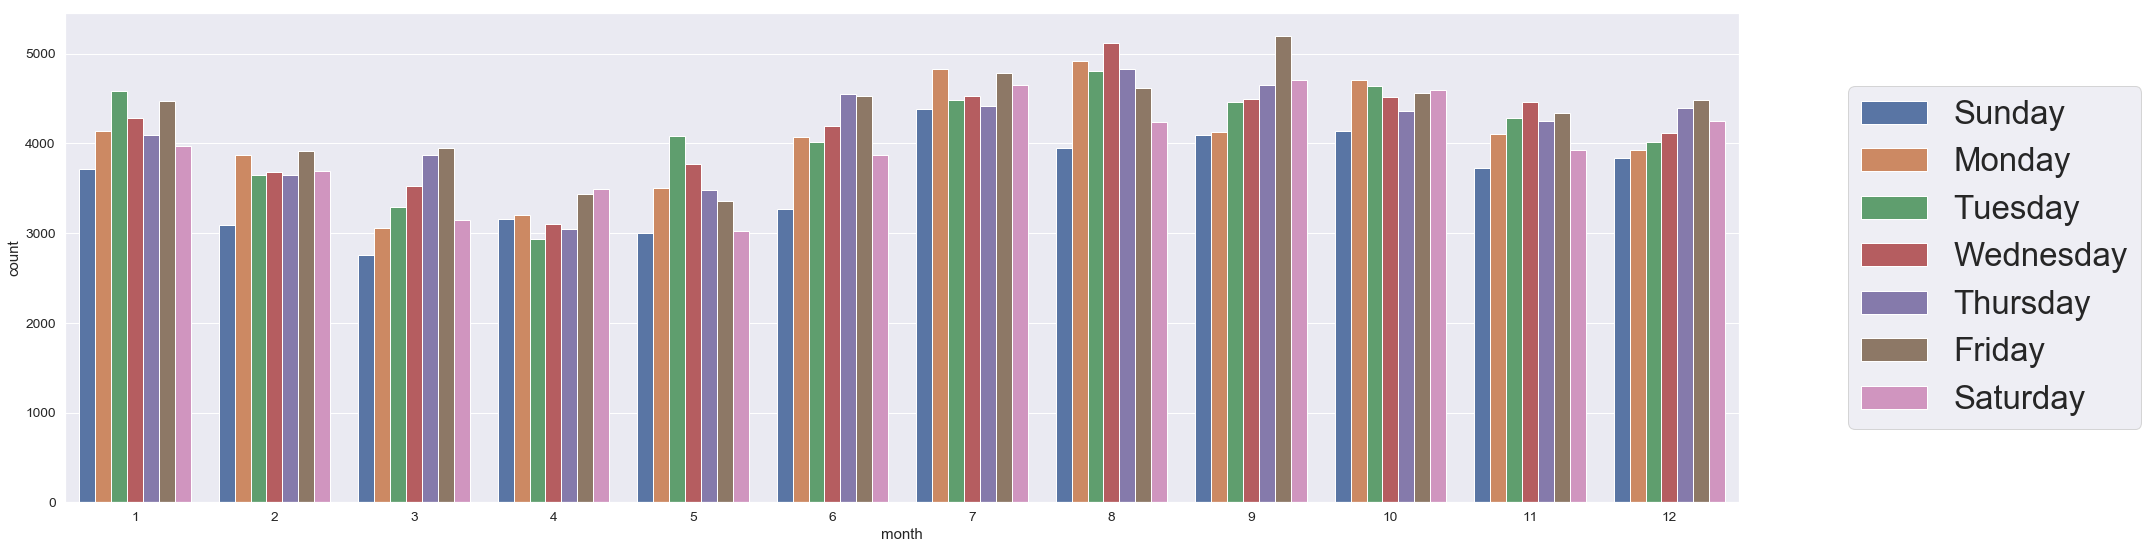

In [54]:
f, ax = plt.subplots(figsize=(30, 9))
sns.set(font_scale=3)
plt.xticks(rotation=0)
sns.countplot(x='month', hue='day_of_week', hue_order=order, data=df_criclean).legend(loc='center right', 
                                                                                 bbox_to_anchor=(1.25, 0.5))

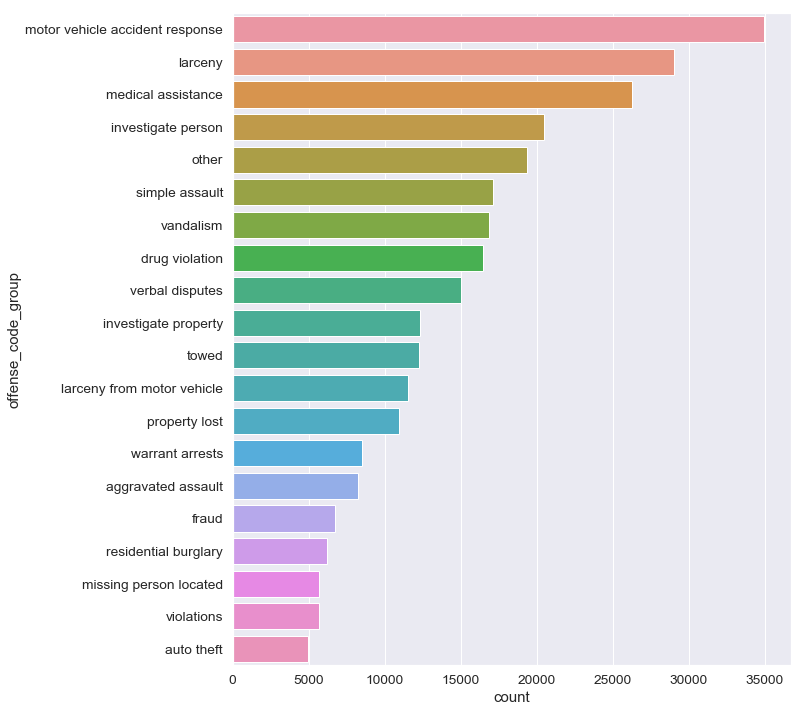

In [55]:
# These are the top 20 offense_code_groups according to the data.

sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(10,12))
sns.countplot(y='offense_code_group', data=df_criclean, order=df_criclean.offense_code_group.value_counts().iloc[:20].index)

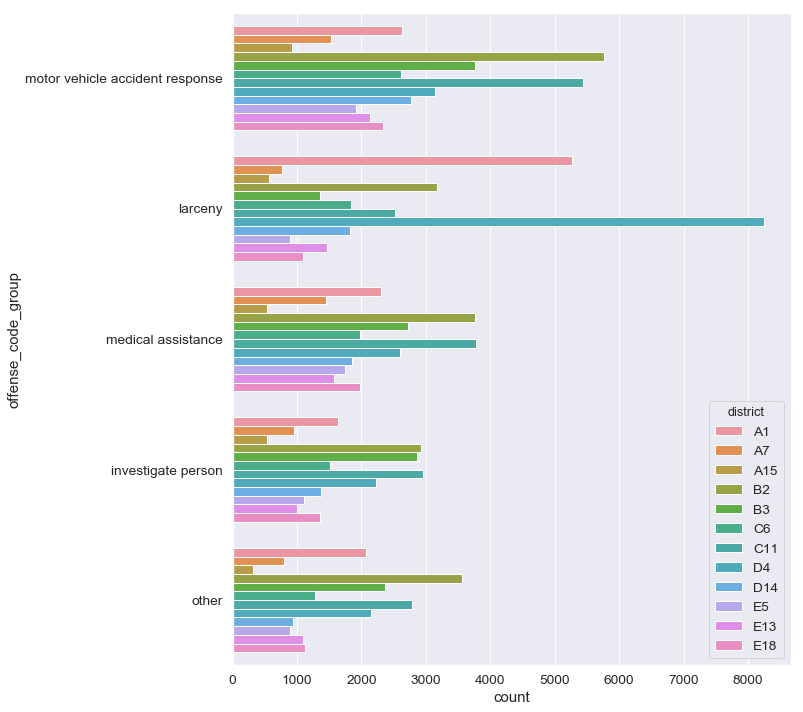

In [56]:
# These are the top 5 offense_code_groups based on district according to the data.
district_order = ['A1', 'A7', 'A15', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(10,12))
sns.countplot(y='offense_code_group', hue = 'district', hue_order = district_order, data=df_criclean, order=df_criclean.offense_code_group.value_counts().iloc[:5].index)

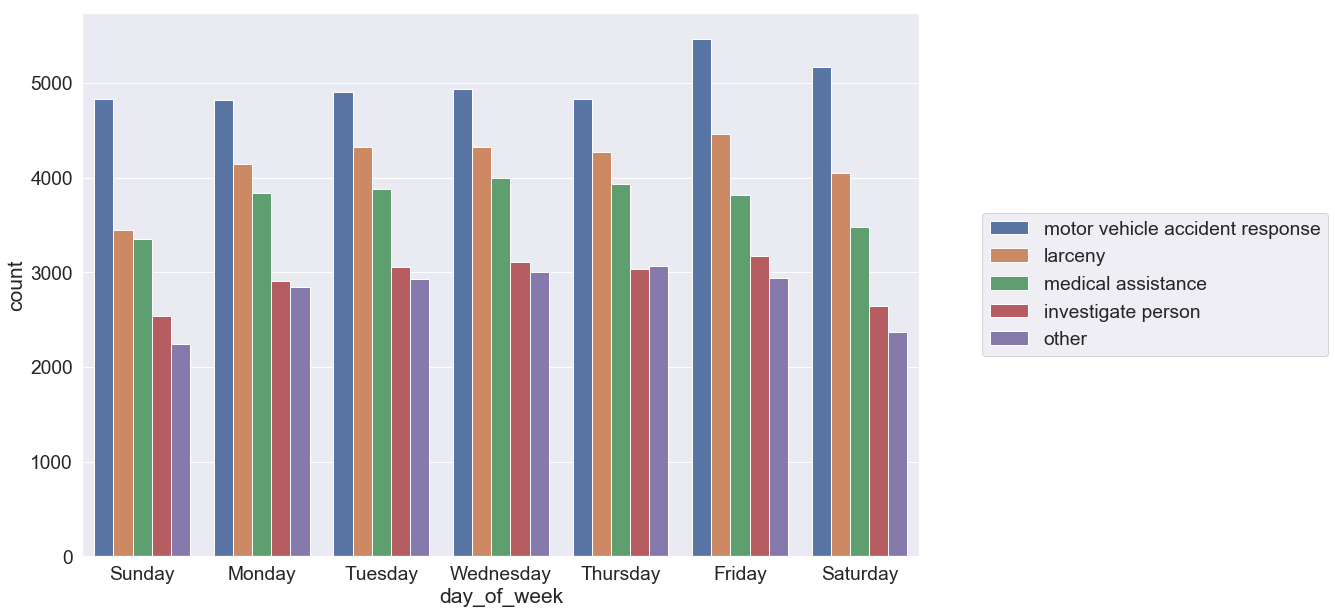

In [57]:
# These are the top 5 offense_code_groups based on the day according to the data.
district_order = ['A1', 'A7', 'A15', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
sns.set(font_scale=1.75)
f, ax = plt.subplots(figsize=(15,10))
sns.countplot(x='day_of_week', hue = 'offense_code_group', order = order, data=df_criclean, 
              hue_order=df_criclean.offense_code_group.value_counts().iloc[:5].index).legend(loc='center right', 
                                                                                 bbox_to_anchor=(1.5, 0.5))

In [58]:
df_criclean.offense_description.nunique()

226

In [59]:
df_criclean.offense_description.unique()

[LARCENY THEFT OF BICYCLE, SICK/INJURED/MEDICAL - PERSON, M/V - LEAVING SCENE - PROPERTY DAMAGE, INVESTIGATE PROPERTY, LARCENY SHOPLIFTING, ..., B&E NON-RESIDENCE DAY - FORCIBLE, B&E RESIDENCE DAY - NO FORCE, B&E NON-RESIDENCE NIGHT - FORCE, PROSTITUTE - COMMON NIGHTWALKER, DRUGS - POSS CLASS D - INTENT MFR DIST DISP]
Length: 226
Categories (226, object): [LARCENY THEFT OF BICYCLE, SICK/INJURED/MEDICAL - PERSON, M/V - LEAVING SCENE - PROPERTY DAMAGE, INVESTIGATE PROPERTY, ..., B&E RESIDENCE DAY - NO FORCE, B&E NON-RESIDENCE NIGHT - FORCE, PROSTITUTE - COMMON NIGHTWALKER, DRUGS - POSS CLASS D - INTENT MFR DIST DISP]

In [60]:
# I'm changing all values to lowercase to see if anything changed. Unfortunately, nothing changed.

df_criclean['offense_description'] = df_criclean.offense_description.str.lower()
df_criclean.offense_description.nunique()

226

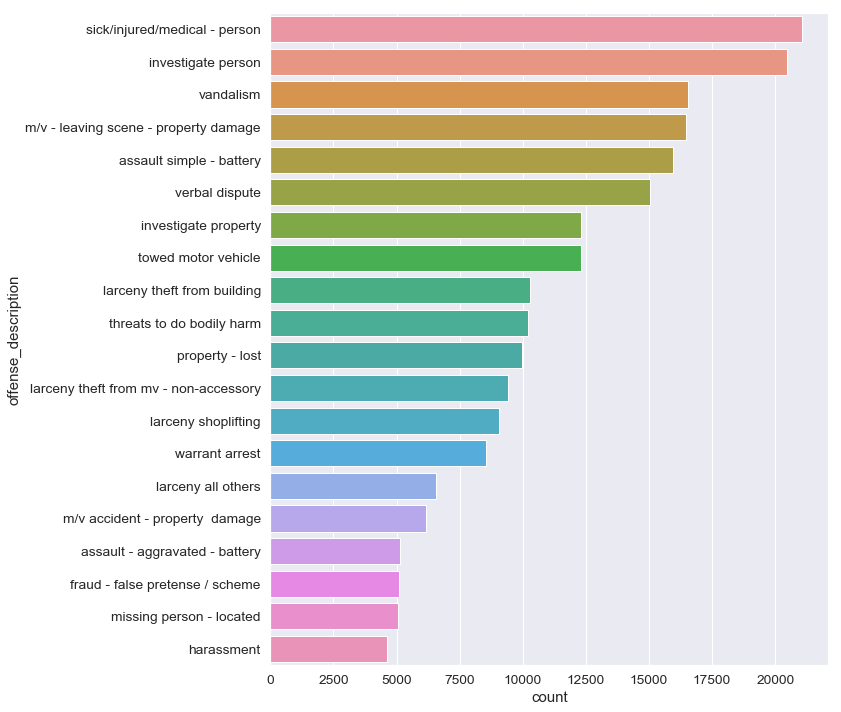

In [61]:
# These are the top 20 offense_description according to the data.

sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(10,12))
sns.countplot(y='offense_description', data=df_criclean, order=df_criclean.offense_description.value_counts().iloc[:20].index)

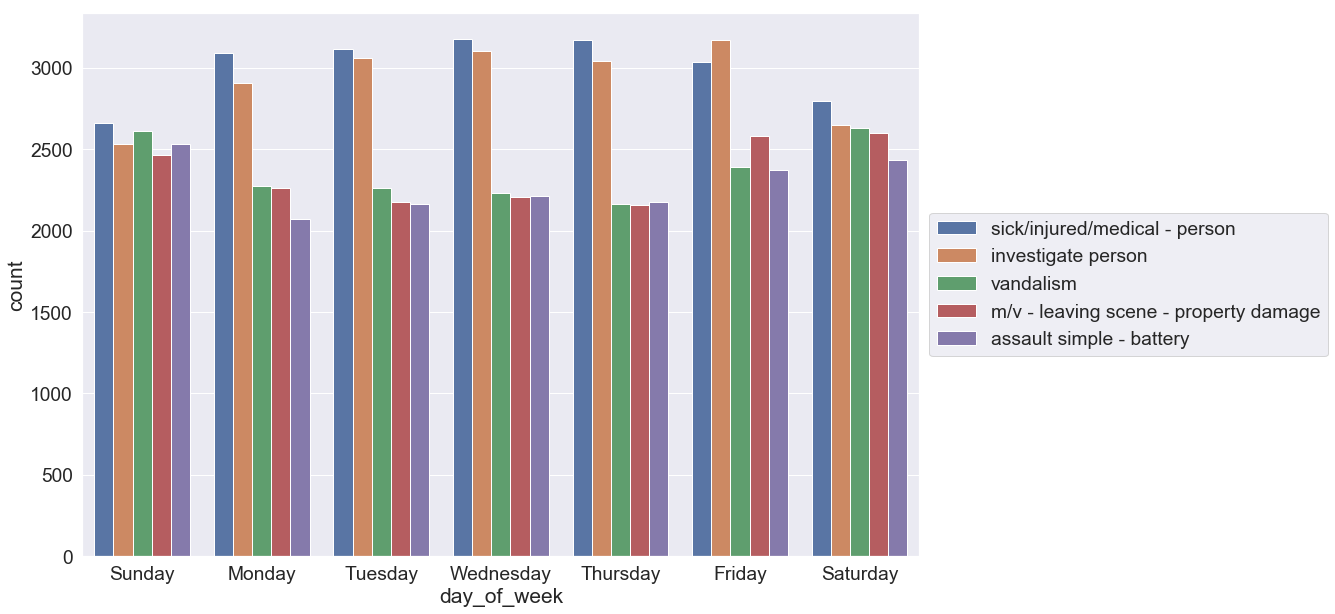

In [62]:
# These are the top 5 offense_descriptions based on the day according to the data.

sns.set(font_scale=1.75)
f, ax = plt.subplots(figsize=(15,10))
sns.countplot(x='day_of_week', hue = 'offense_description', order = order, data=df_criclean, 
              hue_order=df_criclean.offense_description.value_counts().iloc[:5].index).legend(loc='center right', 
                                                                                 bbox_to_anchor=(1.5, 0.5))

In [63]:
df_criclean['district'].value_counts()

B2     52927
C11    46922
D4     43414
B3     39287
A1     36729
C6     24239
D14    21852
E18    19124
E13    18779
E5     14909
A7     14224
A15     7086
Name: district, dtype: int64

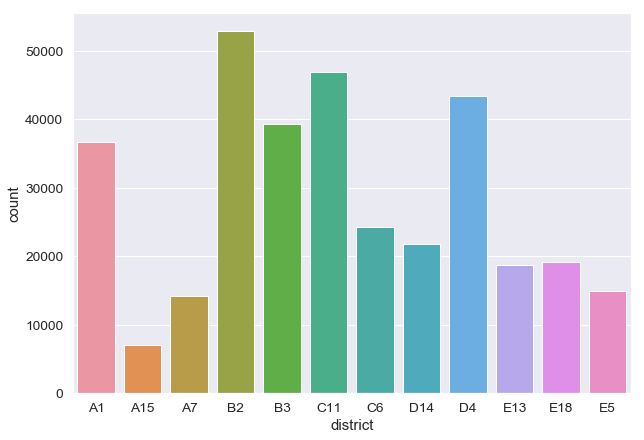

In [64]:
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='district', data=df_criclean)

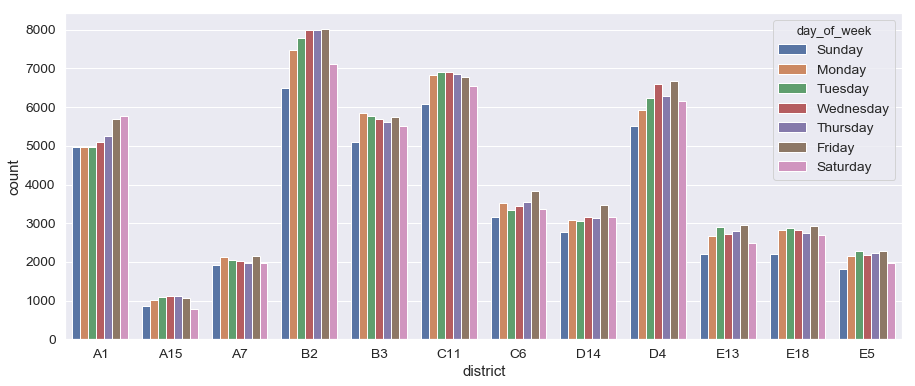

In [65]:
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='district', hue='day_of_week', data=df_criclean, hue_order=order)

## What's the relationship between the 'district' and 'location'?

In [66]:
district = pd.DataFrame(df_criclean[['district', 'location']]).reset_index(drop=True)
district.head()

,district,location
0,D14,"(42.34977988, -71.13423049)"
1,C11,"(42.27342041, -71.07000030)"
2,A7,"(42.37495129, -71.03587934)"
3,B2,"(42.31478432, -71.07160997)"
4,D4,"(42.34489594, -71.09659186)"


In [67]:
# There are over 18,000 unique coordinates.  

district.location.nunique()

18134

In [68]:
# These are the top 20 location coordinates of reported infractions.
district['location'].value_counts().head(20)

(42.34862382, -71.08277637)    1465
(42.36183857, -71.05976489)    1414
(42.28482577, -71.09137369)    1255
(42.32866284, -71.08563401)    1159
(42.25621592, -71.12401947)    1060
(42.29755533, -71.05970910)     930
(42.34128751, -71.05467933)     889
(42.33152148, -71.07085307)     835
(42.35231190, -71.06370510)     799
(42.33511904, -71.07491710)     781
(42.32696647, -71.06198607)     748
(42.33954199, -71.06940877)     735
(42.30971857, -71.10429432)     700
(42.35512339, -71.06087980)     683
(42.33401829, -71.07638124)     646
(42.33210843, -71.07014395)     633
(42.29848866, -71.06313294)     632
(42.34285014, -71.06516235)     625
(42.32696802, -71.08051941)     606
(42.33367922, -71.09187755)     594
Name: location, dtype: int64

In [69]:
# These are the lowest 10 location coordinates of reported infractions

district['location'].value_counts().tail(10)

(42.37698788, -71.05954336)    1
(42.30225860, -71.04875265)    1
(42.37320237, -71.06249233)    1
(42.34468502, -71.03319466)    1
(42.31709787, -71.10005384)    1
(42.33786563, -71.08211116)    1
(42.29031940, -71.16293023)    1
(42.37087715, -71.04061062)    1
(42.37046276, -71.02555257)    1
(42.28117100, -71.08595600)    1
Name: location, dtype: int64

In [70]:
district.groupby('district')['location'].describe().unstack()

        district
count   A1                                36729
        A15                                7086
        A7                                14224
        B2                                52927
        B3                                39287
        C11                               46922
        C6                                24239
        D14                               21852
        D4                                43414
        E13                               18779
        E18                               19124
        E5                                14909
unique  A1                                 1456
        A15                                 664
        A7                                  866
        B2                                 2374
        B3                                 1630
        C11                                2396
        C6                                 1545
        D14                                1636
        D4             

### I'll now take a look at the dates and if I can split them up accordingly.

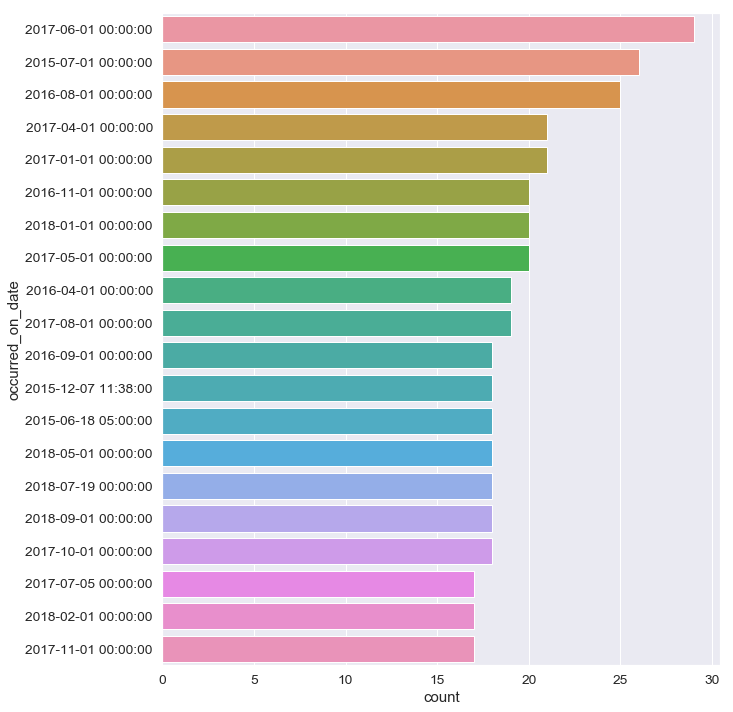

In [71]:
# These are the top 20 'occurred_on_dates' according to the data.
order_hour = range(0,24, 1)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(10,12))
sns.countplot(y='occurred_on_date', data=df_criclean, order=df_criclean.occurred_on_date.value_counts().iloc[:20].index)

In [72]:
df_criclean.occurred_on_date.min()

Timestamp('2015-06-15 00:00:00')

In [73]:
df_criclean.occurred_on_date.max()

Timestamp('2019-03-08 21:13:00')

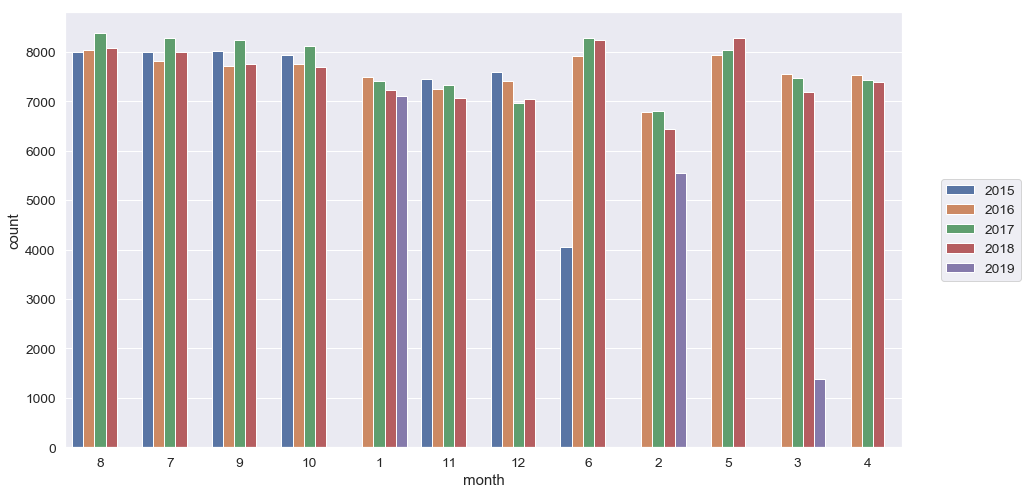

In [74]:
# These are the top 20 'occurred_on_dates' according to the data.

sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(15,8))
sns.countplot(x='month', hue='year', data=df_criclean, order=df_criclean.month.value_counts().iloc[:20].index).legend(loc='center right', 
                                                                                 bbox_to_anchor=(1.15, 0.5))

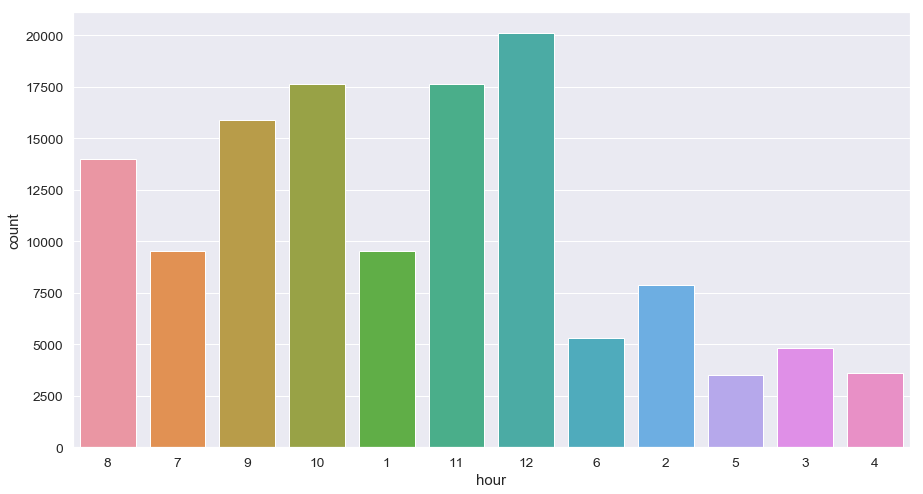

In [75]:
# These are the hours according to the data.

sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(15,8))
sns.countplot(x='hour', data=df_criclean, order=df_criclean.month.value_counts().iloc[:20].index)

In [76]:
district = list(df_criclean.district.unique())
district.sort(reverse=False)
district

['A1', 'A15', 'A7', 'B2', 'B3', 'C11', 'C6', 'D14', 'D4', 'E13', 'E18', 'E5']

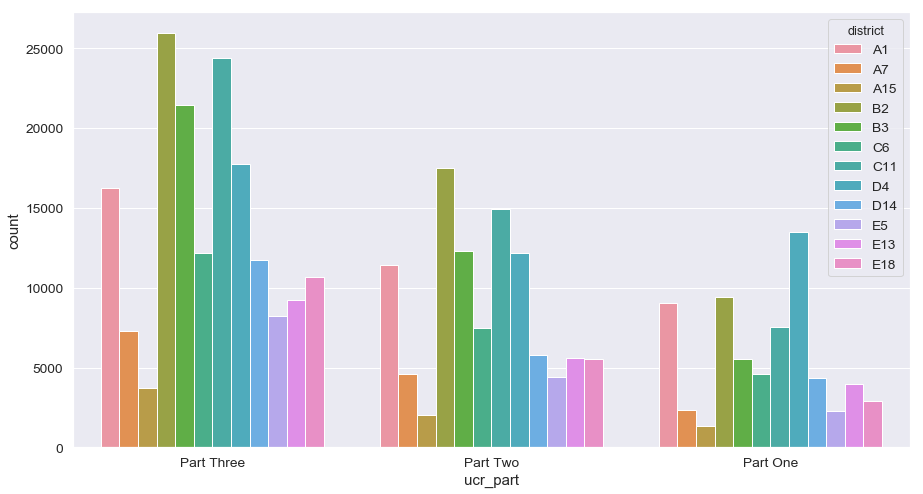

In [77]:
district_order = ['A1', 'A7', 'A15', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
ucr_order = ['Part One', 'Part Two', 'Part Three']
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(15,8))
sns.countplot(x='ucr_part', hue='district',hue_order = district_order, 
              data=df_criclean, order=df_criclean.ucr_part.value_counts().iloc[:20].index)

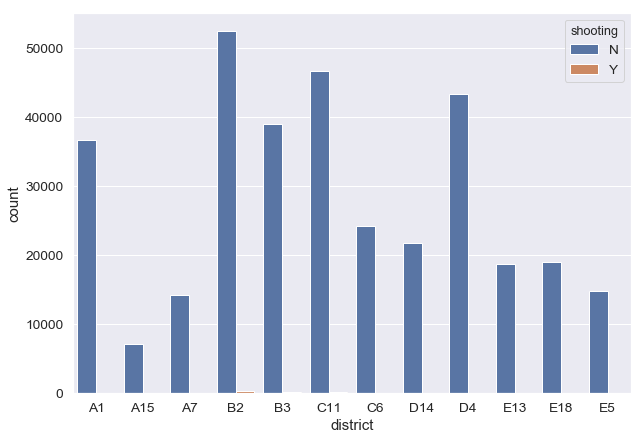

In [78]:
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='district', hue = 'shooting', data=df_criclean)